In [25]:
import numpy as np
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta  # learning rate
        self.n_iter = n_iter  # go through learning loop with all training samples for n times
        self.random_state = random_state  # generate random data in some distribution, like normal / uniform
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)  # develop a pseudorandom generator
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])  # use _ at end of w to avoid name duplication
        self.errors_ = []
        for _ in range(self.n_iter):  # use _ to go through loop which won't use its value
            errors = 0
            for xi, target in zip(X, y):  # use zip() to generate a list of tuple, in each tuple is the X and its corresponding y. 
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi  # matrix can use += operation as a whole
                self.w_[0] += update  # w0 is the threshold, its parameter x0 is constant, no need to multiply
                errors += int(update != 0.0)  # add up error for each sample
            self.errors_.append(errors)
        return self
    def net_input(self, X):
        return np.dot(X, self.w_[1:] + self.w_[0])
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)  # if on the right of line, return 1. else return -1

In [2]:
pip install pandas

     |████████████████████████████████| 9.9MB 6.9MB/s eta 0:00:01
     |████████████████████████████████| 512kB 14.3MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd  
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context  # to solve SSLCertVerificationError in In[15]

In [16]:
import matplotlib.pyplot as plt
import numpy as np
y = df.iloc[0:100, 4].values  # iloc[row range(, cloimn range)]: base on serial number; loc[row (, cloimn)]: base on name. 
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values

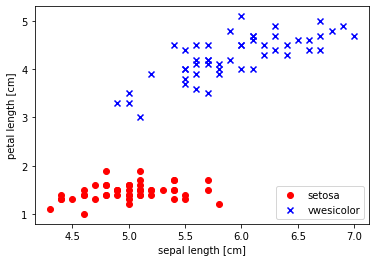

In [41]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')  # 生成一个scatter散点图
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='vwesicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='lower right')
plt.show()

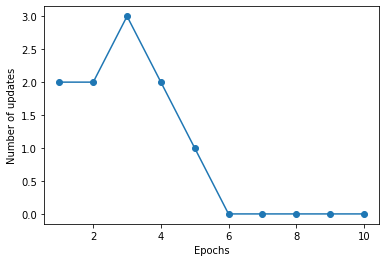

In [31]:
ppn = Perceptron(eta=0.01, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [37]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('o', 'x', 's', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[2:len(np.unique(y))+2])
    x1_min, x1_max = X[:, 0].min()-1, X[:, 0].max()+1
    x2_min, x2_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='purple')  # alpha:transparency(0,1)

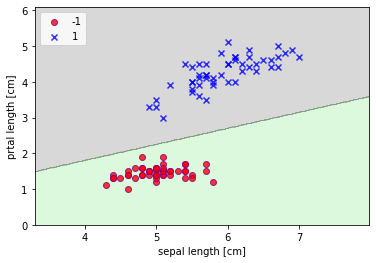

In [38]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('prtal length [cm]')
plt.legend(loc='upper left')
plt.show()